In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class GameOfLife(object):
 
  def __init__(self, cells_shape):
    """
    Parameters
    ----------
    cells_shape : A tuple representing the size of the canvas.
 
    Examples
    --------
    game = GameOfLife((20, 30))
     
    """
 
    # The four sides of the matrix do not participate in the operation
    self.cells = np.zeros(cells_shape)
 
    real_width = cells_shape[0] - 2
    real_height = cells_shape[1] - 2
     
    self.cells[1:-1, 1:-1] = np.random.randint(2, size=(real_width, real_height))
    self.timer = 0
    self.mask = np.ones(9)
    self.mask[4] = 0
   
  def update_state(self):
    """Update status once"""
    buf = np.zeros(self.cells.shape)
    cells = self.cells
    for i in range(1, cells.shape[0] - 1):
        for j in range(1, cells.shape[0] - 1):
            # Calculate the number of surviving cells around this cell
            neighbor = cells[i-1:i+2, j-1:j+2].reshape((-1, ))
            neighbor_num = np.convolve(self.mask, neighbor, 'valid')[0]
            if neighbor_num == 3:
                buf[i, j] = 1
            elif neighbor_num == 2:
                buf[i, j] = cells[i, j]
            else:
                buf[i, j] = 0
        self.cells = buf
        self.timer += 1
   
  def plot_state(self):
    """Draw the current state"""
    plt.title('Iter :{}'.format(self.timer))
    plt.imshow(self.cells)
    plt.show()
 
  def update_and_plot(self, n_iter):
    """Update the status and draw a picture"""
    
    plt.ion()
    for _ in range(n_iter):
        plt.title('Iter :{}'.format(self.timer))
        plt.imshow(self.cells)
        self.update_state()
        plt.pause(0.2)
        plt.ioff()
           


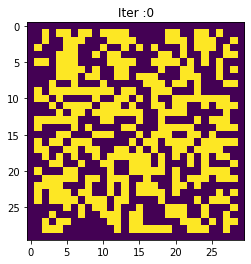

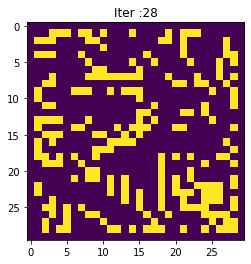

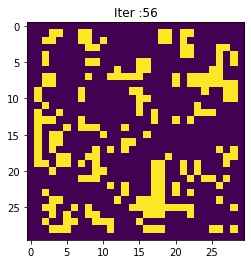

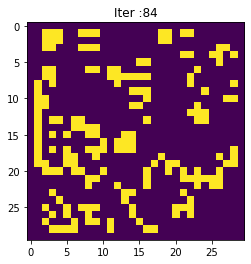

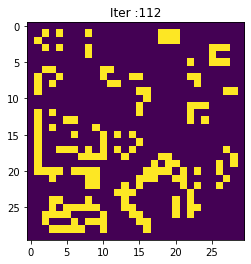

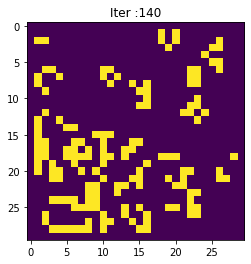

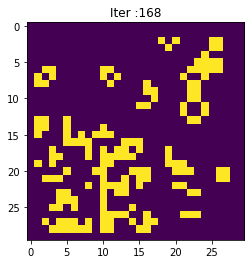

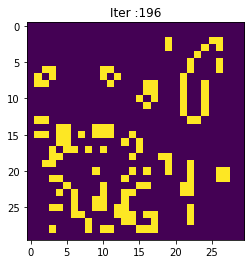

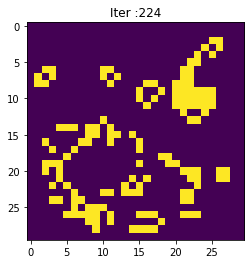

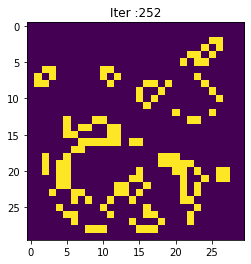

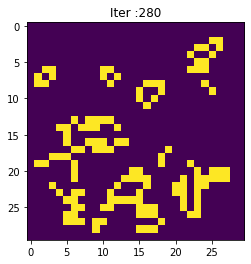

In [3]:
if __name__ == '__main__':
    game = GameOfLife(cells_shape=(30, 30))
    game.update_and_plot(11)